In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import LabelEncoder

In [2]:
rawDF = pd.read_csv("metaverse.csv")

rawDF.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [3]:
rawDF.describe()


,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


In [4]:
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the timestamp col is 0
The number of na values in the hour_of_day col is 0
The number of na values in the sending_address col is 0
The number of na values in the receiving_address col is 0
The number of na values in the amount col is 0
The number of na values in the transaction_type col is 0
The number of na values in the location_region col is 0
The number of na values in the ip_prefix col is 0
The number of na values in the login_frequency col is 0
The number of na values in the session_duration col is 0
The number of na values in the purchase_pattern col is 0
The number of na values in the age_group col is 0
The number of na values in the risk_score col is 0
The number of na values in the anomaly col is 0


In [5]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")

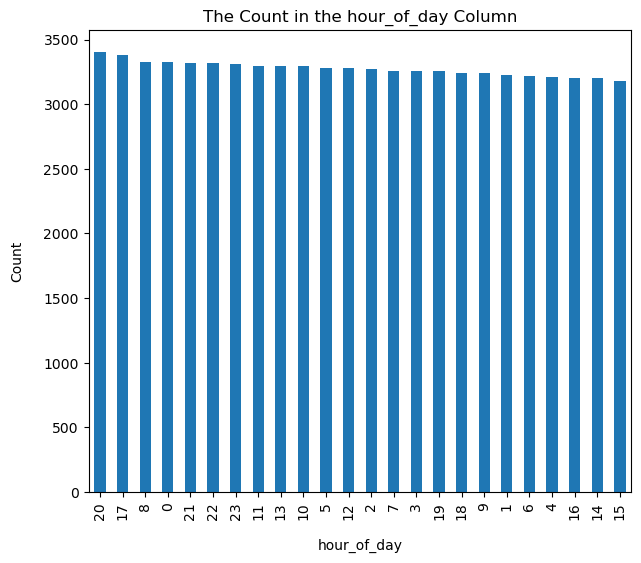

In [6]:
makeBarValueCount(rawDF, "hour_of_day")

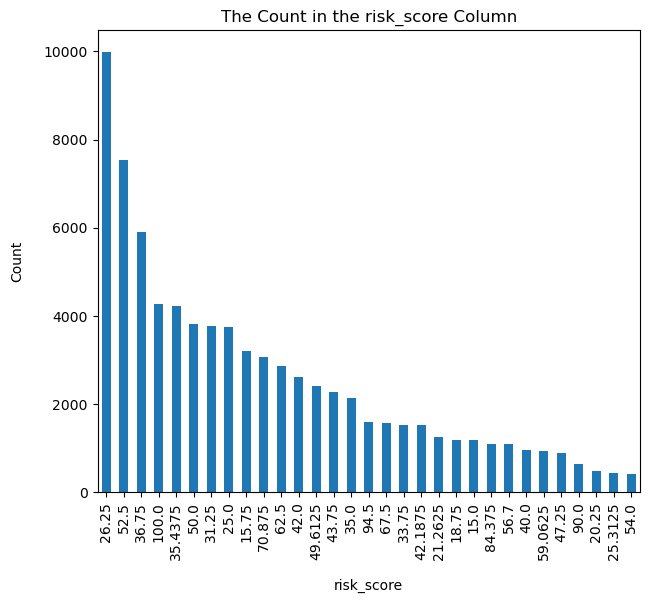

In [7]:
makeBarValueCount(rawDF, "risk_score")

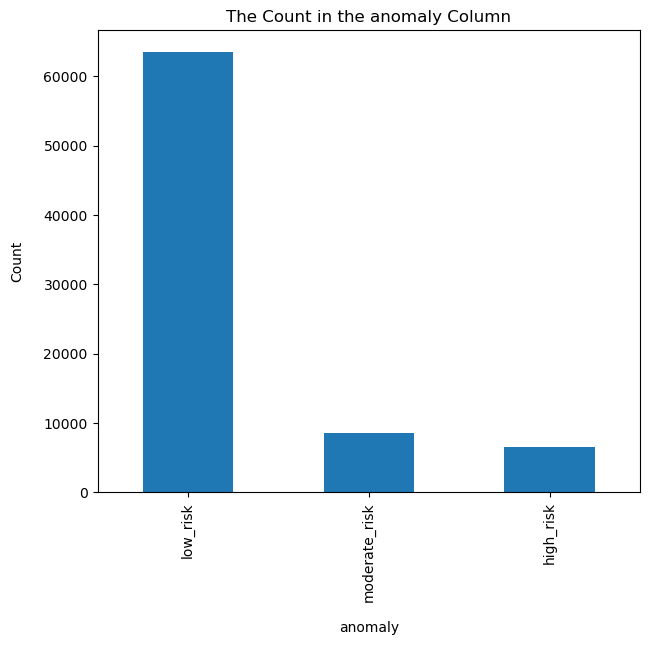

In [8]:
makeBarValueCount(rawDF, "anomaly")

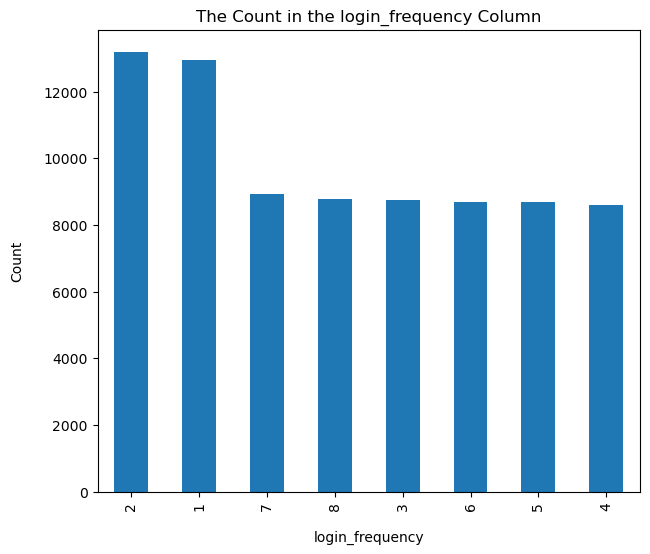

In [9]:
makeBarValueCount(rawDF, "login_frequency")

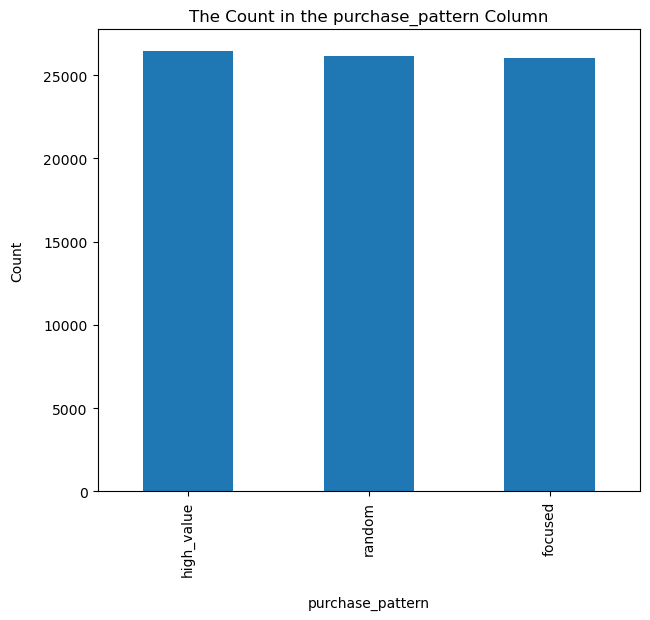

In [10]:
makeBarValueCount(rawDF, "purchase_pattern")

In [11]:
rawDF['timestamp'] = pd.to_datetime(rawDF['timestamp'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [12]:
columns_to_remove = ['sending_address', 'receiving_address']
rawDF = rawDF.drop(columns=columns_to_remove)

In [13]:
label_encoder = LabelEncoder()

new_df = rawDF.copy()

# Perform label encoding for each column
new_df['transaction_type'] = label_encoder.fit_transform(new_df['transaction_type'])
new_df['anomaly'] = label_encoder.fit_transform(new_df['anomaly'])
new_df['age_group'] = label_encoder.fit_transform(new_df['age_group'])
new_df['purchase_pattern'] = label_encoder.fit_transform(new_df['purchase_pattern'])
new_df['location_region'] = label_encoder.fit_transform(new_df['location_region'])


In [14]:
columns_to_remove2 = ['timestamp']
new_df =new_df.drop(columns=columns_to_remove2)

In [15]:
rawDF.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [16]:
new_df.head()

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,796.949206,4,2,192.000,3,48,0,0,18.75,1
1,19,0.010000,1,4,172.000,5,61,0,0,25.00,1
2,16,778.197390,1,1,192.168,3,74,0,0,31.25,1
3,9,300.838358,4,4,172.000,8,111,1,2,36.75,1
4,14,775.569344,2,0,172.160,6,100,1,2,62.50,2


Text(0.5, 1.0, 'Meta Transaction Features')

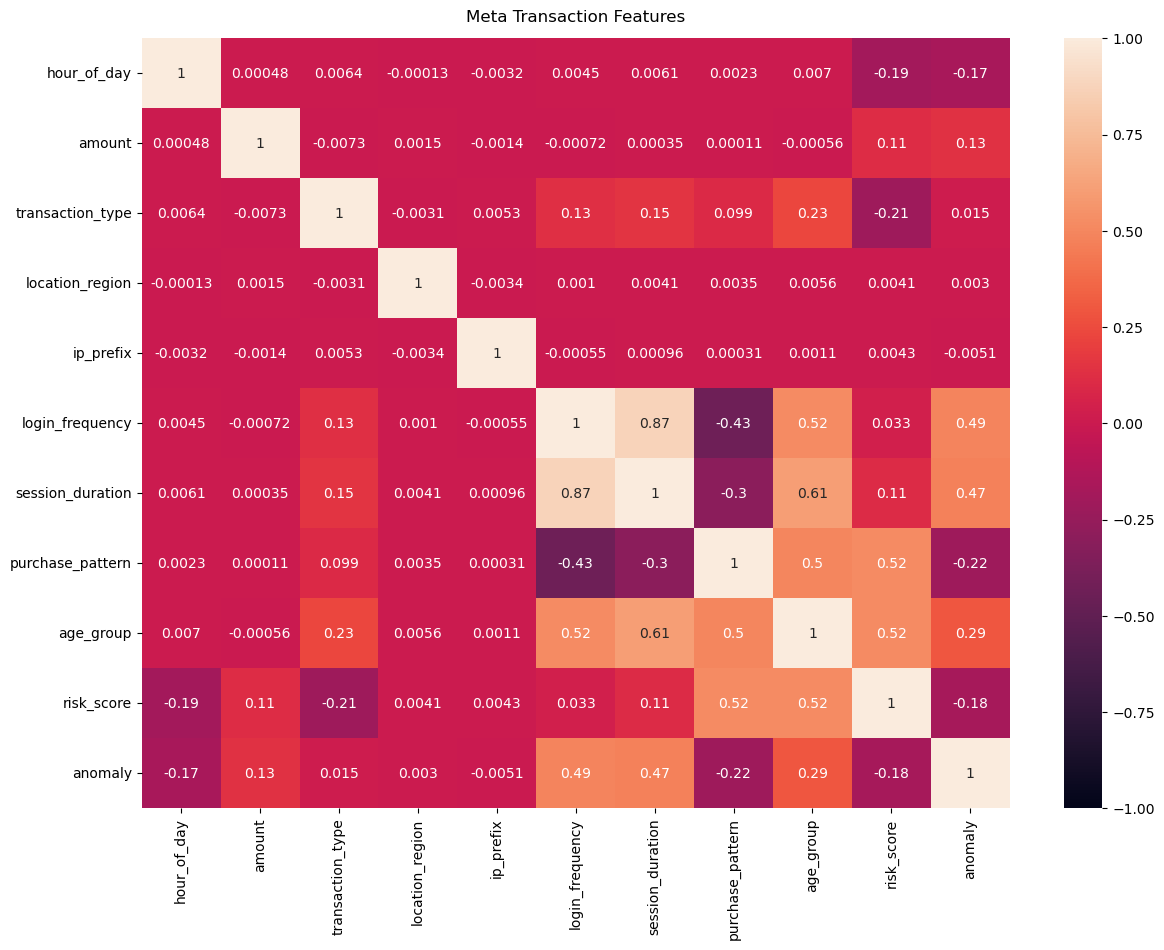

In [17]:

# Increase the size of the heatmap.
plt.figure(figsize=(14, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Meta Transaction Features', fontdict={'fontsize':12}, pad=12)

In [18]:
xDF=new_df.drop(columns = ["anomaly"], axis = 1)
yDF = new_df["anomaly"]

xDF.head()

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score
0,12,796.949206,4,2,192.000,3,48,0,0,18.75
1,19,0.010000,1,4,172.000,5,61,0,0,25.00
2,16,778.197390,1,1,192.168,3,74,0,0,31.25
3,9,300.838358,4,4,172.000,8,111,1,2,36.75
4,14,775.569344,2,0,172.160,6,100,1,2,62.50


In [19]:
yDF.head()

0    1
1    1
2    1
3    1
4    2
Name: anomaly, dtype: int32

In [20]:
pd.DataFrame(yDF)

,anomaly
0,1
1,1
2,1
3,1
4,2
...,...
78595,1
78596,1
78597,1
78598,1


In [21]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF, 
    test_size = 0.05,
    shuffle = True)

In [22]:

from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# Define the parameter grid
#parameters = {'C': [1, .5],
              'gamma': [1, 5],
              'kernel': ['linear', 'rbf']}

#Initialize GridSearchCV
#grid_search = GridSearchCV(estimator=SVC(),  
                           #param_grid=parameters,
                           #scoring='accuracy',
                           #cv=5,
                           #verbose=0)

#scaler = StandardScaler()
#xTrainScaled = scaler.fit_transform(xTrainScaled)

#grid_search.fit(xTrainScaled, yTrain)

# Get the best parameters
#svm_params = grid_search.best_params_

# Display the best parameters
#print("Best parameters for SVM:", svm_params)


In [ ]:
from sklearn.neural_network import MLPClassifier

#parameters = parameter_space = {
    #'max_iter': [1000],
    #'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    #'activation': ['relu'],
    #'solver': ['adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
#}
#gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           #param_grid = parameters,
                           #scoring = 'accuracy',
                           #cv = 5,
                           #verbose=0)


#gridSearch.fit(xTrainScaled, yTrain) 

#mlpParams = gridSearch.best_params_

#mlpParams


{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'constant',
 'max_iter': 1000,
 'solver': 'adam'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#parameters = {'criterion': ['gini', 'entropy'],
 #             'splitter': ['best', 'random'],
  #            'max_depth': [None, 10, 20, 30, 40, 50],
   #           'min_samples_split': [2, 5, 10],
    #          'min_samples_leaf': [1, 2, 4],
     #         'max_features': [None, 'sqrt', 'log2']}

              
#gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
 #                          param_grid = parameters,
  #                         scoring = 'accuracy',
   #                        cv = 5,
    #                       verbose=0)


#gridSearch.fit(xTrainScaled, yTrain) 

#treeParams = gridSearch.best_params_

#treeParams

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import StandardScaler


# Define the parameter grid for Linear Regression
#parameters = [{'fit_intercept': [True, False]}]  # Adjust according to your requirements

# Initialize GridSearchCV for Linear Regression
#grid_search = GridSearchCV(estimator=LinearRegression(),  
 #                          param_grid=parameters,
  #                         scoring='accuracy',
   #                        cv=5,
    #                       verbose=0)

#scaler = StandardScaler()
#xTrainScaled = scaler.fit_transform(xTrainScaled)

# Fit GridSearchCV to find the best parameters
#grid_search.fit(xTrainScaled, yTrain)

# Get the best parameters
#linear_params = grid_search.best_params_

# Display the best parameters
#print("Best parameters for Linear Regression:", linear_params)


Best parameters for Linear Regression: {'fit_intercept': True}


c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kcale\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kcale\anaconda

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define the parameter grid for KNN
parameters = {'n_neighbors': [1, 3, 5, 7, 9]}  
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),  
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrainScaled)

# Fit GridSearchCV to find the best parameters
grid_search.fit(xTrainScaled, yTrain)

# Get the best parameters
knn_params = grid_search.best_params_

# Display the best parameters
print("Best parameters for KNN:", knn_params)


Best parameters for KNN: {'n_neighbors': 3}


In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [27]:
 from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xTrain.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yTrain.iloc[valIndex]

    # Instantiate the model
    regressor = DecisionTreeRegressor(random_state=42)  
    # Train the regressor on the training data
    regressor.fit(xLocalTrain, yLocalTrain)
    
    # Make predictions on the validation data
    yPred = regressor.predict(xVal)

    # Calculate Mean Squared Error and store it
    mse = mean_squared_error(yVal, yPred)
    mse_scores.append(mse)
    
    # Calculate R-squared and store it
    r2 = r2_score(yVal, yPred)
    r2_scores.append(r2)

    print(f"Completed Fold {i}")
    print(f"    Mean Squared Error={mse_scores[i]}    R-squared={r2_scores[i]}")

Completed Fold 0
    Mean Squared Error=0.0    R-squared=1.0
Completed Fold 1
    Mean Squared Error=0.0    R-squared=1.0
Completed Fold 2
    Mean Squared Error=0.0    R-squared=1.0
Completed Fold 3
    Mean Squared Error=0.0    R-squared=1.0
Completed Fold 4
    Mean Squared Error=0.0    R-squared=1.0


In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xTrain.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yTrain.iloc[valIndex]

    # Feature scaling
    xScaler = StandardScaler()
    xTrainScaled = xScaler.fit_transform(xLocalTrain)
    xValScaled = xScaler.transform(xVal)

    # Instantiate the model
    regressor = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)  
    # Train the regressor on the training data
    regressor.fit(xTrainScaled, yLocalTrain)
    
    ### Mdel prediction and evaluation
    # Make predictions on the validation data
    yPred = regressor.predict(xValScaled)

    # Calculate Mean Squared Error and store it
    mse = mean_squared_error(yVal, yPred)
    mse_scores.append(mse)
    
    # Calculate R-squared and store it
    r2 = r2_score(yVal, yPred)
    r2_scores.append(r2)

    print(f"Completed Fold {i}")
    print(f"    Mean Squared Error={mse_scores[i]}    R-squared={r2_scores[i]}")

Completed Fold 0
    Mean Squared Error=0.0001154880941525372    R-squared=0.9993721818324204
Completed Fold 1
    Mean Squared Error=0.0002327635783409804    R-squared=0.9987894164791257
Completed Fold 2
    Mean Squared Error=7.617358277533782e-05    R-squared=0.9996072502269615
Completed Fold 3
    Mean Squared Error=0.00013818914614082567    R-squared=0.9992712119624908
Completed Fold 4
    Mean Squared Error=8.268740815327816e-05    R-squared=0.9995744683208748


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xTrain.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yTrain.iloc[valIndex]

    # Feature scaling (optional for Linear Regression)
    xScaler = StandardScaler()
    xTrainScaled = xScaler.fit_transform(xLocalTrain)
    xValScaled = xScaler.transform(xVal)

   # Instantiate the model
    regressor = LinearRegression()
    # Train the regressor on the training data
    regressor.fit(xLocalTrain, yLocalTrain)
 
    # Make predictions on the validation data
    yPred = regressor.predict(xVal)

    # Calculate Mean Squared Error and store it
    mse = mean_squared_error(yVal, yPred)
    mse_scores.append(mse)
    
    # Calculate R-squared and store it
    r2 = r2_score(yVal, yPred)
    r2_scores.append(r2)

    print(f"Completed Fold {i}")
    print(f"    Mean Squared Error={mse_scores[i]}    R-squared={r2_scores[i]}")

Completed Fold 0
    Mean Squared Error=0.099679314378072    R-squared=0.45812176607762356
Completed Fold 1
    Mean Squared Error=0.1020120732242347    R-squared=0.46944390674999903
Completed Fold 2
    Mean Squared Error=0.1029704298946247    R-squared=0.4690861123065255
Completed Fold 3
    Mean Squared Error=0.10133135941595706    R-squared=0.4655941900702427
Completed Fold 4
    Mean Squared Error=0.10328066056303375    R-squared=0.46848989595759916


In [33]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):
    # Making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xTrain.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yTrain.iloc[valIndex]

    # Feature scaling (recommended for SVM)
    xScaler = StandardScaler()
    xTrainScaled = xScaler.fit_transform(xLocalTrain)
    xValScaled = xScaler.transform(xVal)

    # Instantiate the model
    regressor = SVR(kernel='linear')  
    # Train the regressor on the training data
    regressor.fit(xTrainScaled, yLocalTrain)
  
    # Make predictions on the validation data
    yPred = regressor.predict(xValScaled)

    # Calculate Mean Squared Error and store it
    mse = mean_squared_error(yVal, yPred)
    mse_scores.append(mse)
    
    # Calculate R-squared and store it
    r2 = r2_score(yVal, yPred)
    r2_scores.append(r2)

    print(f"Completed Fold {i}")
    print(f"    Mean Squared Error={mse_scores[i]}    R-squared={r2_scores[i]}")

Completed Fold 0
    Mean Squared Error=0.13186123699070743    R-squared=0.2831738995281148
Completed Fold 1
    Mean Squared Error=0.13491210085362704    R-squared=0.2983336687637693
Completed Fold 2
    Mean Squared Error=0.13900802217677163    R-squared=0.28327686356194237
Completed Fold 3
    Mean Squared Error=0.13415841883242577    R-squared=0.2924693906381366
Completed Fold 4
    Mean Squared Error=0.1370944059925582    R-squared=0.2944752522350118


In [23]:

xTrain2, xTest2, yTrain2, yTest2 = train_test_split(
    xDF, yDF, 
    test_size = 0.3,
    shuffle = True)

In [24]:
xScaler = StandardScaler()
xColNames = xTrain2.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model with specified hyperparameters
regressor = LinearRegression(fit_intercept=True, positive=True)
regressor.fit(xTrain2, yTrain2)

# Make predictions on the test data
yPred = regressor.predict(xTest2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yTest2, yPred)

# Calculate R-squared score
r2 = r2_score(yTest2, yPred)

print(f"Mean Squared Error (MSE) on test data: {mse}")
print(f"R-squared score on test data: {r2}")

Mean Squared Error (MSE) on test data: 0.14161618179966223
R-squared score on test data: 0.26615746393772044


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Decision Tree regressor with specified hyperparameters
tree_regressor = DecisionTreeRegressor(criterion='squared_error',
                                       max_depth=None,
                                       max_features=None,
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       splitter='best')

# Train the Decision Tree model
tree_regressor.fit(xTrain2, yTrain2)

# Make predictions on the test data
y_pred_tree = tree_regressor.predict(xTest2)

# Calculate Mean Squared Error (MSE)
mse_tree = mean_squared_error(yTest2, y_pred_tree)

# Calculate R-squared score
r2_tree = r2_score(yTest2, y_pred_tree)

print(f"Mean Squared Error (MSE) on test data (Decision Tree): {mse_tree}")
print(f"R-squared score on test data (Decision Tree): {r2_tree}")




Mean Squared Error (MSE) on test data (Decision Tree): 0.0
R-squared score on test data (Decision Tree): 1.0


In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize MLP regressor with specified hyperparameters
mlp_regressor = MLPRegressor(activation='relu',
                              alpha=0.0001,
                              hidden_layer_sizes=(50, 50),
                              learning_rate='constant',
                              max_iter=1000,
                              solver='adam')


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain2)

# Train the MLP model
mlp_regressor.fit(xTrainScaled, yTrain2)

# Make predictions on the test data
xTestScaled = scaler.transform(xTest2)  
y_pred_mlp = mlp_regressor.predict(xTestScaled)

# Calculate Mean Squared Error (MSE)
mse_mlp = mean_squared_error(yTest2, y_pred_mlp)

# Calculate R-squared score
r2_mlp = r2_score(yTest2, y_pred_mlp)

print(f"Mean Squared Error (MSE) on test data (MLP): {mse_mlp}")
print(f"R-squared score on test data (MLP): {r2_mlp}")


Mean Squared Error (MSE) on test data (MLP): 0.00019952824711966347
R-squared score on test data (MLP): 0.9989660622605298


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize KNN regressor with specified hyperparameters (3 neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=3)


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain2)

# Train the KNN model
knn_regressor.fit(xTrainScaled, yTrain2)

# Make predictions on the test data
xTestScaled = scaler.transform(xTest2)  
y_pred_knn = knn_regressor.predict(xTestScaled)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(yTest2, y_pred_knn)

# Calculate R-squared score
r2_knn = r2_score(yTest2, y_pred_knn)

print(f"Mean Squared Error (MSE) on test data (KNN with 3 neighbors): {mse_knn}")
print(f"R-squared score on test data (KNN with 3 neighbors): {r2_knn}")


Mean Squared Error (MSE) on test data (KNN with 3 neighbors): 0.0001602111016869286
R-squared score on test data (KNN with 3 neighbors): 0.9991698002327616


In [28]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize SVM regressor with specified hyperparameters (C=1)
svm_regressor = SVR(C=1)


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain2)

# Train the SVM model
svm_regressor.fit(xTrainScaled, yTrain2)

# Make predictions on the test data
xTestScaled = scaler.transform(xTest2)  # Apply the same scaling to the test data
y_pred_svm = svm_regressor.predict(xTestScaled)

# Calculate Mean Squared Error (MSE)
mse_svm = mean_squared_error(yTest2, y_pred_svm)

# Calculate R-squared score
r2_svm = r2_score(yTest2, y_pred_svm)

print(f"Mean Squared Error (MSE) on test data (SVM with C=1): {mse_svm}")
print(f"R-squared score on test data (SVM with C=1): {r2_svm}")


Mean Squared Error (MSE) on test data (SVM with C=1): 0.0038525364851257843
R-squared score on test data (SVM with C=1): 0.9800364964752644


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize GBM regressor with specified hyperparameters
gbm_regressor = GradientBoostingRegressor(loss='squared_error',  
                                          learning_rate=0.1, 
                                          n_estimators=100,  
                                          max_depth=3,  
                                          min_samples_split=2,  
                                          min_samples_leaf=1,  
                                          max_features=None)  
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain2)

# Train the GBM model
gbm_regressor.fit(xTrainScaled, yTrain2)

# Make predictions on the test data
xTestScaled = scaler.transform(xTest2)  
y_pred_gbm = gbm_regressor.predict(xTestScaled)

# Calculate Mean Squared Error (MSE)
mse_gbm = mean_squared_error(yTest2, y_pred_gbm)

# Calculate R-squared score
r2_gbm = r2_score(yTest2, y_pred_gbm)

print(f"Mean Squared Error (MSE) on test data (GBM): {mse_gbm}")
print(f"R-squared score on test data (GBM): {r2_gbm}")


Mean Squared Error (MSE) on test data (GBM): 1.3618114337691416e-10
R-squared score on test data (GBM): 0.9999999992943214
